## Import data 

In [8]:
# Import packages
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [9]:


df = pd.read_csv("C:/Users/frede/OneDrive/Documents/GitHub/Group/Group-31-SoDa/Data/test.csv", index_col=0)

#Cleaning genre
df['Genre 1'] = df["Genre 1"].str.replace(" ", "")
df["Genre 2"] = df["Genre 2"].str.replace(" ", "")
df["Genre 3"] = df["Genre 3"].str.replace(" ", "")

df1 = df.copy().reset_index()
df2 = df.copy().reset_index() 
df3 = df.copy().reset_index()
df4 = df.copy().reset_index()
df5 = df.copy().reset_index()


###  Plot of top ten directors 

In [10]:
for e in range(8262):
    if "[" in df1["Director"][e]:
        df1["Director"][e] = df1["Director"][e].split(",")[0].replace("[","").replace("'","")
    else:
        pass

C:\Users\frede\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


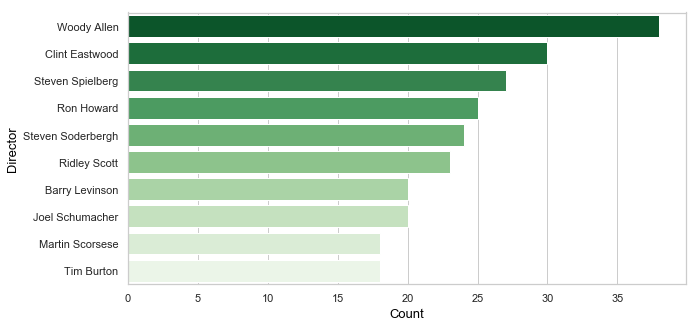

In [11]:
# top 10 directors overall
top10_directors = df["Director"].value_counts()[:10]
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(top10_directors.values, top10_directors.index, palette=("Greens_r"))
plt.xlabel("Count", fontsize=13, color="Black")
plt.ylabel("Director", fontsize=13, color="Black")
#plt.title("Top 10 Lead Stars - Overall", fontsize = 14, fontweight="bold", color="Black")
plt.show()

### Plot of top ten actors

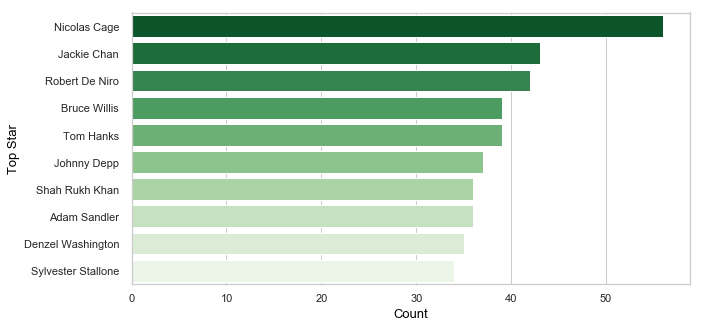

In [12]:
top10_actors = df["Lead"].value_counts()[:10]
plt.figure(figsize=(10,5))
sns.set(style="whitegrid")
sns.barplot(top10_actors.values, top10_actors.index, palette=("Greens_r"))
plt.xlabel("Count", fontsize=13, color="Black")
plt.ylabel("Top Star", fontsize=13, color="Black")
#plt.title("Top 10 Lead Stars - Overall", fontsize = 14, fontweight="bold", color="Black")
plt.show()

### Female leads

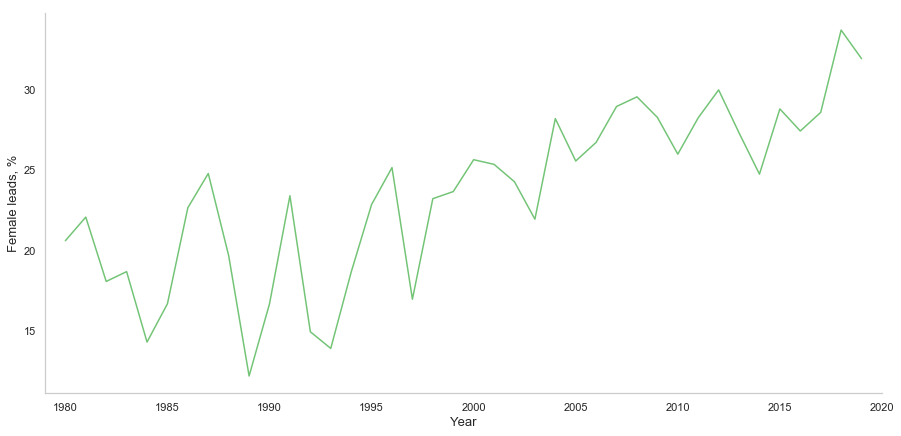

In [13]:
df1 = df.groupby(['Year'])

df2 = df1['Female'].mean().reset_index()
df2['Female'] = df2['Female']*100

plt.figure(figsize=(15,7))
df3 = df2.set_index('Year')
ax = sns.lineplot(data=df3, legend = None, palette = 'Greens')
ax.set_xlim([1979,2020])
ax.grid(False)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Female leads, %', fontsize=13)
matplotlib.rc('xtick', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13) 
sns.despine(left=False, right=True, bottom=False)
plt.savefig("percent actresses")

### Genre 

In [23]:
# Getting and transforming the data

test_df = df2[['Female', 'Genre 1', 'Genre 2', 'Genre 3']]

genre_1 = test_df[['Female', 'Genre 1']]
genre_2 = test_df[['Female', 'Genre 2']]
genre_3 = test_df[['Female', 'Genre 3']]

genre_1x = genre_1.rename(columns = {'Genre 1': 'Genre'})
genre_2x = genre_2.rename(columns = {'Genre 2': 'Genre'})
genre_3x = genre_3.rename(columns = {'Genre 3': 'Genre'})


all_genres = pd.concat([genre_1x, genre_2x, genre_3x])


#Ad total amount of males vs females in the graph below in a pie chart

In [6]:
ratios

NameError: name 'ratios' is not defined

NameError: name 'all_genres' is not defined

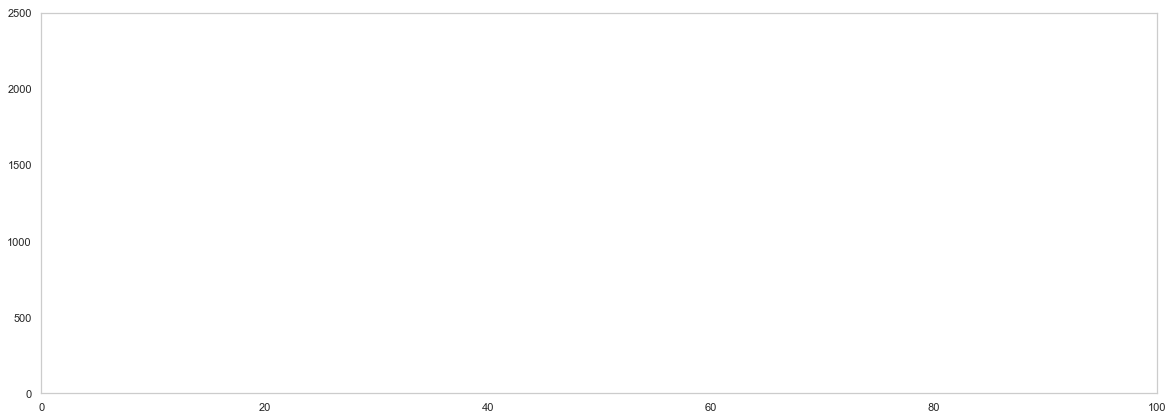

In [7]:
#Define data used for pie chart
ratios = df["Female"].value_counts("0")
labels = 'Male', 'Female'
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Female')

#Outer plot
fig, ax = plt.subplots(figsize = (20, 7))
ax.set_xlim([0,100]) #Sets the number of the axis
ax.set_ylim([0,2500])
ax.grid(False)


axes = sns.countplot(x="Genre", data=all_genres, hue="Female", order = all_genres['Genre'].value_counts()[:10].index, hue_order = all_genres['Female'].value_counts().index, palette='Greens_r')
plt.xlabel('Genre', fontsize=13, color='Black')
plt.ylabel('Count', fontsize=13, color='Black')
plt.legend(loc='upper left', frameon=False)

# Inner plot
ax1= plt.axes([0.55, 0.6, 0.7, 0.3])
wedges, texts, autotexts = plt.pie(ratios, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=180, colors = ["green",'yellowgreen'], textprops=dict(color="white"), wedgeprops   = { 'linewidth' : 1,'edgecolor' : "white" })
plt.setp(autotexts, size=15, weight='bold')
plt.legend(wedges, labels, loc='best', frameon=False)
plt.tight_layout()

ax1.legend(bbox_to_anchor=(0.7, 0.9), frameon=False)

### Directors